In [15]:
from medpy.io import load
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

*The apparent diffusion coefficient is a measure compute from diffusion-weighted images and supposed to represent real physical values. See https://radiopaedia.org/articles/diffusion-weighted-imaging-1 and https://radiopaedia.org/articles/apparent-diffusion-coefficient-1 for more information.*

This script computes an ADC images from two DWI images. Let's take a look at our source images.

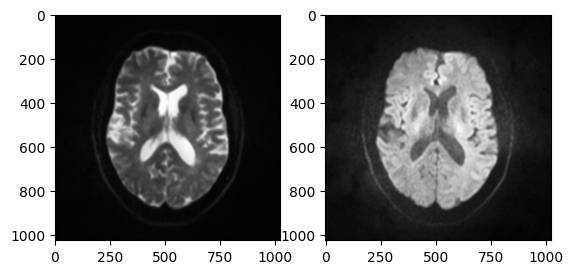

In [21]:
i1, _ = load("resources/b0.nii.gz")
i2, _ = load("resources/b1000.nii.gz")

f, axarr = plt.subplots(1, 2)
axarr[0].imshow(i1, cmap = cm.Greys_r)
axarr[1].imshow(i2, cmap = cm.Greys_r)

The scripts requires two input files and the b-value of the second image.

In [18]:
!medpy_apparent_diffusion_coefficient.py -h

usage: medpy_apparent_diffusion_coefficient.py [-h] [-t THRESHOLD] [-v] [-d]
                                               [-f]
                                               b0image bximage b output

Computes the apparent diffusion coefficient from two diffusion weighted
MRI images. The output image will be of type float.

Normally diffusion weight (DW) MRI images are acquired once with a
b-value of 0 (which we call b0) and once with another b-value (which we
call bx) such as 500, 800 or 1000. The latter is typical for brain MRIs.
This results in a single b0 DW image and three bx DW images, one for each
direction.

Usually the three bx DW images are already combined into an isotropic
average image (which we call abx) denoting the length of the three-dimensional
vector formed by the the three bx images.

The formula presented in [1] is applied to the b0 and abx images to
compute the apparent diffusion coefficient (ADC):

ADC = -bx-value * ln(abx-image / b0-image)

To cope with zero-va

That means we have to call it like this.

In [19]:
!medpy_apparent_diffusion_coefficient.py resources/b0.nii.gz resources/b1000.nii.gz 1000 output/adc.nii.gz -f

Which results in the following image.

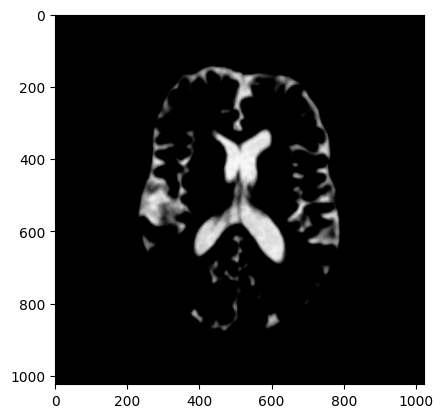

In [20]:
o, _ = load("output/adc.nii.gz")
plt.imshow(o, cmap = cm.Greys_r)

The results are more impressive with actual 3D volumes, from which reliable value can be computed.